In [7]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import model_selection

In [8]:
dt = pd.read_csv('data/AirPass.csv')
dt=dt.drop(['Unnamed: 0'], axis=1)
dt.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [9]:
dt.isnull().sum().sum()

310

In [10]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [11]:
median_arrival_delay = dt['Arrival Delay in Minutes'].median()
dt['Arrival Delay in Minutes'] = dt['Arrival Delay in Minutes'].fillna(median_arrival_delay)
dt['Arrival Delay in Minutes'].mean()

15.133392362180475

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
gender_sat = dt.groupby('Gender')['satisfaction'].value_counts()
gender_sat

Gender  satisfaction           
Female  neutral or dissatisfied    30193
        satisfied                  22534
Male    neutral or dissatisfied    28686
        satisfied                  22491
Name: count, dtype: int64

In [27]:
type_sat = dt.groupby('Type of Travel')['satisfaction'].value_counts()
type_sat

Type of Travel   satisfaction           
Business travel  satisfied                  41746
                 neutral or dissatisfied    29909
Personal Travel  neutral or dissatisfied    28970
                 satisfied                   3279
Name: count, dtype: int64

In [30]:
class_sat = dt.groupby('Class')['satisfaction'].value_counts(normalize=True)
class_sat

Class     satisfaction           
Business  satisfied                  0.694251
          neutral or dissatisfied    0.305749
Eco       neutral or dissatisfied    0.813862
          satisfied                  0.186138
Eco Plus  neutral or dissatisfied    0.753936
          satisfied                  0.246064
Name: proportion, dtype: float64

In [31]:
dt['satisfaction'] = dt['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
dt['Customer Type'] = dt['Customer Type'].map({'Loyal Customer':1, 'disloyal Customer':0})
dt['Type of Travel'] = dt['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})
dt['Gender'] = dt['Gender'].map({'Male': 0, 'Female': 1})

In [32]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  int64  
 2   Customer Type                      103904 non-null  int64  
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  int64  
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [33]:
dt = pd.get_dummies(dt, columns=['Class'])
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  int64  
 2   Customer Type                      103904 non-null  int64  
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  int64  
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [34]:
X = dt.drop(['satisfaction'], axis=1)
y = dt['satisfaction']

In [35]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.2, random_state=26)
print(f'Test shape {X_test.shape[0]}')

Test shape 20781


In [36]:
from sklearn import preprocessing

In [38]:
s_scaler = preprocessing.StandardScaler()
s_scaler.fit(X_train, y_train)
X_train_scal = s_scaler.transform(X_train)
X_test_scal = s_scaler.transform(X_test)
X_test_scal[0][0]

0.9408251379303

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scal, y_train)
y_train_lr = lr.predict(X_train_scal)
y_test_lr = lr.predict(X_test_scal)
print(f'F1 score train {round(metrics.f1_score(y_train, y_train_lr),3)}')
print(f'F1 score test {round(metrics.f1_score(y_test, y_test_lr),3)}')

F1 score train 0.854
F1 score test 0.855


In [42]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [43]:
dt = DecisionTreeClassifier(random_state=26)
ada = AdaBoostClassifier(estimator=dt, random_state=26, learning_rate=0.01)
ada.fit(X_train_scal, y_train)
y_train_ada = ada.predict(X_train_scal)
y_test_ada = ada.predict(X_test_scal)
print(f'F1 score train ada {round(metrics.f1_score(y_train, y_train_ada),3)}')
print(f'F1 score test ada {round(metrics.f1_score(y_test, y_test_ada),3)}')

F1 score train ada1.0
F1 score test ada0.94


In [47]:
from sklearn.model_selection import GridSearchCV
params = {"n_estimators":2**np.arange(8), "learning_rate":0.1**np.arange(3)}
gs = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=params, scoring='f1' ,cv=3, n_jobs=-1)
gs.fit(X_train_scal,y_train)
y_train_gb = gs.predict(X_train_scal)
y_test_gb = gs.predict(X_test_scal)
print("Лучшие гиперпараметры:", gs.best_params_)
print("Лучшее значение метрики:", gs.best_score_)

Лучшие гиперпараметры: {'learning_rate': 1.0, 'n_estimators': 128}
Лучшее значение метрики: 0.9491405348305864
F1 score train gb 0.961
F1 score test gb 0.951


In [48]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=26)
xgb.fit(X_train_scal, y_train)
y_train_xgb = xgb.predict(X_train_scal)
y_test_xgb = xgb.predict(X_test_scal)
print(f'F1 score train xgb {round(metrics.f1_score(y_train, y_train_xgb),3)}')
print(f'F1 score test xgb {round(metrics.f1_score(y_test, y_test_xgb),3)}')

F1 score train xgb 0.976
F1 score test xgb 0.957


In [49]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(random_state=26)
cb.fit(X_train_scal, y_train)
y_train_cb = cb.predict(X_train_scal)
y_test_cb = cb.predict(X_test_scal)
print(f'F1 score train cb {round(metrics.f1_score(y_train, y_train_cb),3)}')
print(f'F1 score test cb {round(metrics.f1_score(y_test, y_test_cb),3)}')

Learning rate set to 0.068023
0:	learn: 0.6018089	total: 212ms	remaining: 3m 32s
1:	learn: 0.5020769	total: 243ms	remaining: 2m 1s
2:	learn: 0.4472481	total: 261ms	remaining: 1m 26s
3:	learn: 0.4028675	total: 277ms	remaining: 1m 8s
4:	learn: 0.3674724	total: 296ms	remaining: 58.9s
5:	learn: 0.3397844	total: 317ms	remaining: 52.6s
6:	learn: 0.3121211	total: 336ms	remaining: 47.7s
7:	learn: 0.2917499	total: 355ms	remaining: 44s
8:	learn: 0.2749039	total: 374ms	remaining: 41.1s
9:	learn: 0.2575191	total: 397ms	remaining: 39.3s
10:	learn: 0.2473690	total: 423ms	remaining: 38.1s
11:	learn: 0.2377531	total: 441ms	remaining: 36.3s
12:	learn: 0.2279309	total: 465ms	remaining: 35.3s
13:	learn: 0.2212512	total: 493ms	remaining: 34.7s
14:	learn: 0.2100359	total: 515ms	remaining: 33.8s
15:	learn: 0.2025733	total: 533ms	remaining: 32.8s
16:	learn: 0.1942303	total: 550ms	remaining: 31.8s
17:	learn: 0.1877939	total: 567ms	remaining: 30.9s
18:	learn: 0.1832381	total: 585ms	remaining: 30.2s
19:	learn: 

In [56]:
from catboost.utils import get_confusion_matrix
from catboost import Pool
cm = get_confusion_matrix(cb, Pool(X_train_scal, y_train))
cm/cm.sum()

array([[0.56134884, 0.00655655],
       [0.01532668, 0.41676792]])

<Axes: >

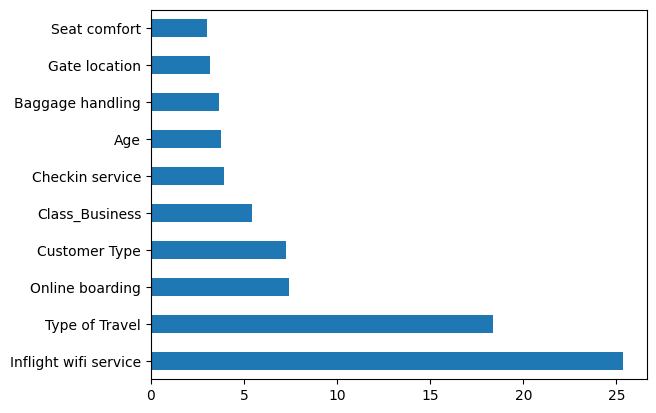

In [52]:
importances = cb.feature_importances_
feature_importances = pd.Series(importances, index=X_train.columns)
feature_importances.sort_values(ascending=False).nlargest(10).plot(kind='barh')